In [1]:
import sys
assert sys.version_info >= (3, 5)

import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os
import tarfile
import urllib
import pandas as pd
import urllib.request

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")
 
import category_encoders as ce 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn import metrics
from sklearn.model_selection import KFold


In [2]:
def load_data():
    csv_path ="./train-set.csv"
    return pd.read_csv(csv_path)

In [3]:
pd.options.display.float_format = '{:,.0f}'.format

df = load_data() # "housing" is a pandas DataFrame object containing all the data
df.head() # Display the top five rows of the DataFrame
#Q1 How many attribuites in the data set? Desribe the attribuites .

,CustomerID,Gender,Married,Age,Graduated,Profession,WorkExperience,SpendingScore,FamilySize,Category,Segmentation
0,462809,Male,No,22,No,Healthcare,1,Low,4,Category 4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3,Category 4,A
2,466315,Female,Yes,67,Yes,Engineer,1,Low,1,Category 6,B
3,461735,Male,Yes,67,Yes,Lawyer,0,High,2,Category 6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6,Category 6,A


In [4]:
df['SpendingScore'].value_counts()

Low        4878
Average    1974
High       1216
Name: SpendingScore, dtype: int64

In [5]:
df['Category'].value_counts()

Category 6    5238
Category 4    1089
Category 3     822
Category 2     422
Category 7     203
Category 1     133
Category 5      85
Name: Category, dtype: int64

In [6]:
df['Segmentation'].value_counts()

D    2268
A    1972
C    1970
B    1858
Name: Segmentation, dtype: int64

In [7]:
dictionary_SpendingScore=[{'col':'SpendingScore','mapping':{'Low':1,'Average':2,'High':3}}]
encoder=ce.OrdinalEncoder(cols='SpendingScore',mapping=dictionary_SpendingScore)

x_train_encoded =encoder.fit_transform(df)

dictionary_Category=[{'col':'Category','mapping':{'Category 1':1,'Category 2':2,'Category 3':3,'Category 4':4,'Category 5':5,'Category 6':6,'Category 7':7}}]
encoder=ce.OrdinalEncoder(cols='Category',mapping=dictionary_Category)

x_train_encoded =encoder.fit_transform(x_train_encoded)

dictionary_Segmentation=[{'col':'Segmentation','mapping':{'A':1,'B':2,'C':3,'D':4}}]
encoder=ce.OrdinalEncoder(cols='Category',mapping=dictionary_Segmentation)

x_train_encoded =encoder.fit_transform(x_train_encoded)

#coding the Category to number
x_train_encoded.Gender = pd.Categorical(x_train_encoded.Gender)
x_train_encoded['Gender'] = x_train_encoded.Gender.cat.codes

x_train_encoded.Married = pd.Categorical(x_train_encoded.Married)
x_train_encoded['Married'] = x_train_encoded.Married.cat.codes

x_train_encoded.Graduated = pd.Categorical(x_train_encoded.Graduated)
x_train_encoded['Graduated'] = x_train_encoded.Graduated.cat.codes

x_train_encoded.Profession = pd.Categorical(x_train_encoded.Profession)
x_train_encoded['Profession'] = x_train_encoded.Profession.cat.codes



x_train_encoded.head() 

,CustomerID,Gender,Married,Age,Graduated,Profession,WorkExperience,SpendingScore,FamilySize,Category,Segmentation
0,462809,1,0,22,0,5,1,1,4,4,4
1,462643,0,1,38,1,2,NaN,2,3,4,1
2,466315,0,1,67,1,2,1,1,1,6,2
3,461735,1,1,67,1,7,0,3,2,6,2
4,462669,0,1,40,1,3,NaN,3,6,6,1


In [8]:

x_train_encoded["WorkExperience"] = pd.to_numeric(x_train_encoded["WorkExperience"])


nan_value = float("NaN")
#x_train_encoded.replace(0, nan_value, inplace=True)
x_train_encoded.dropna(subset = ["FamilySize"], inplace=True)
x_train_encoded.dropna(subset = ["WorkExperience"], inplace=True)
 
x_train_encoded["WorkExperience"] = x_train_encoded["WorkExperience"].astype(int)

X=np.array(x_train_encoded[['Gender','Married','Age','Graduated','Profession','WorkExperience','SpendingScore','FamilySize','Category']])

y=np.array(x_train_encoded['Segmentation'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)
print(X_train)
print(X_train.shape)
print(y)
print(y.shape)

[[ 1.  1. 39. ...  2.  2.  1.]
 [ 0.  0. 27. ...  1.  4.  6.]
 [ 0.  1. 41. ...  2.  2.  6.]
 ...
 [ 0.  0. 38. ...  1.  8.  2.]
 [ 1.  1. 40. ...  1.  2.  6.]
 [ 0.  0. 55. ...  1.  1.  6.]]
(4878, 9)
[4 2 2 ... 4 2 2]
(6969,)


In [9]:
clf = DecisionTreeClassifier(max_depth=2,criterion='gini',splitter='best',random_state=42)
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.4734576757532281


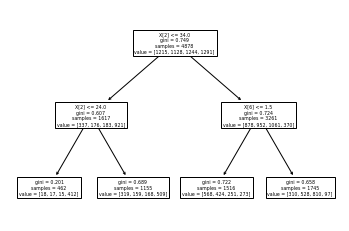

In [10]:
plot_tree(clf);

In [239]:
clf = DecisionTreeClassifier(max_depth=3,criterion='gini',splitter='best',random_state=42)
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.4868483978957437


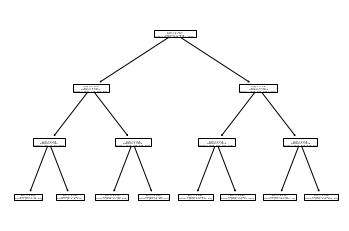

In [240]:
plot_tree(clf);

In [241]:
clf = DecisionTreeClassifier(max_depth=4,criterion='gini',splitter='best',random_state=42)
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5212816834050693


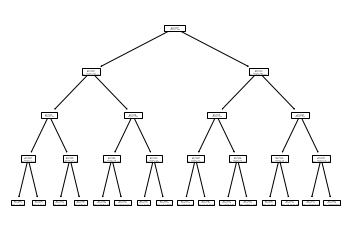

In [242]:
plot_tree(clf);

In [243]:
clf = DecisionTreeClassifier(max_depth=5,criterion='gini',splitter='best',random_state=42)
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5198469631755142


In [244]:
kfold = KFold(3, True, 1)

C:\Users\rashe\.conda\envs\F21DL\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass shuffle=True, random_state=1 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


In [245]:
for train_index, test_index in kfold.split(X):
     print("TRAIN:", train_index, "TEST:", test_index)
     X_train, X_test = X[train_index], X[test_index]
     y_train, y_test = y[train_index], y[test_index]
print(X_train);
print(y_train);

TRAIN: [   0    1    2 ... 6966 6967 6968] TEST: [   4    5   12 ... 6963 6964 6965]
TRAIN: [   0    2    4 ... 6964 6965 6966] TEST: [   1    3    6 ... 6961 6967 6968]
TRAIN: [   1    3    4 ... 6965 6967 6968] TEST: [   0    2    8 ... 6960 6962 6966]
[[ 0.  1. 67. ...  1.  1.  6.]
 [ 1.  1. 56. ...  2.  2.  6.]
 [ 1.  0. 32. ...  1.  3.  6.]
 ...
 [ 1.  0. 35. ...  1.  4.  4.]
 [ 0.  0. 27. ...  1.  4.  6.]
 [ 1.  1. 37. ...  2.  3.  4.]]
[2 3 3 ... 4 2 2]


In [246]:
clf = DecisionTreeClassifier(max_depth=4,criterion='gini',splitter='best',random_state=42)
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5260439087387


In [247]:
X=np.array(x_train_encoded[['FamilySize','Category']])

y=np.array(x_train_encoded['Segmentation'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [248]:
def plot_decision_boundary(clf, X, y, axes=[0, 10, 0, 10], iris=False, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)  
    custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
    plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8) 
    
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "yo", label="A")
    plt.plot(X[:, 0][y==2], X[:, 1][y==2], "bs", label="B")
    plt.plot(X[:, 0][y==3], X[:, 1][y==3], "g^", label="C")
    plt.plot(X[:, 0][y==4], X[:, 1][y==4], "g^", label="D")
   
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    
    if legend:
        plt.legend(loc="lower right", fontsize=14)

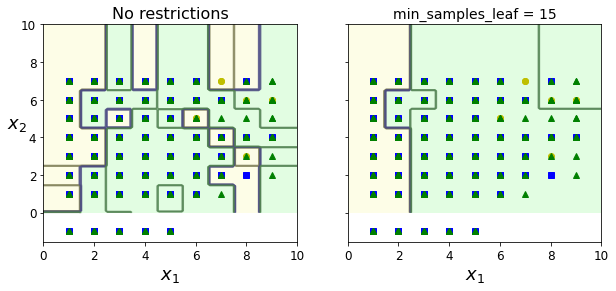

In [249]:
deep_tree_clf1 = DecisionTreeClassifier()
deep_tree_clf2 = DecisionTreeClassifier(max_depth=4,min_samples_leaf=15,criterion='gini',splitter='best', random_state=42)
deep_tree_clf1 = deep_tree_clf1.fit(X_train,y_train)
deep_tree_clf2 = deep_tree_clf2.fit(X_train,y_train)

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)
plt.sca(axes[0]) 
plot_decision_boundary(deep_tree_clf1, X_train, y_train)
 
plt.title("No restrictions", fontsize=16)
plt.sca(axes[1])
plot_decision_boundary(deep_tree_clf2, X_train, y_train )
plt.title("min_samples_leaf = {}".format(deep_tree_clf2.min_samples_leaf), fontsize=14)
plt.ylabel("")
plt.show()